In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 시각화를 할 때 한글 출력을 위해서 import
import platform
from matplotlib import font_manager, rc

# 그래프에서 한글을 사용하기 위해서 설정
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
# 그래프에 음수를 사용하기 위해서     
#plt.rcParams['axes_unicode_minus'] = False

In [36]:
# 데이터 가져오기 - stock-data.csv
df = pd.read_csv('./data/data/stock-data.csv')
print(df.head())
df.info() # 현재는 Date가 object로 되어있음

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [8]:
# 날짜 자료형으로 변경해서 새로운 필드로 저장
df['NewDate'] = pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     20 non-null     object        
 1   Close    20 non-null     int64         
 2   Start    20 non-null     int64         
 3   High     20 non-null     int64         
 4   Low      20 non-null     int64         
 5   Volume   20 non-null     int64         
 6   NewDate  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None


In [9]:
# 새로 만들어진 날짜 컬럼을 인덱스로 지정하고 기존의 날짜 컬럼 삭제
df.set_index('NewDate', inplace=True)
df.drop('Date', axis=1, inplace=True)
print(df.head())

            Close  Start   High    Low  Volume
NewDate                                       
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039


In [23]:
# 첫 번째 데이터는 날짜로 변경 가능한 데이터이고 두 번째 데이터는 날짜로 변경 불가능한 데이터
date_strings = np.array([
    '03-04-2005 11:35 PM','04-09-2005 09:09 TM'])

# 예외 발생
# print([pd.to_datetime(date,format='%d-%m-%Y %I:%M %p') for date in date_strings])

# 예외가 발생하면 문자열 그대로 저장(errors 옵션)
# list는 2개의 데이터 자료형이 달라도 문제가 없지만(print 1번)
# array나 DataFrame으로 변환해서 사용하는 경우에는 문제가 발생할 수 있음(print2,3번)
# np array & pd DataFrame → 데이터 타입이 일치해야함
# 이 방법은 권장하지 않음
print([pd.to_datetime(date,format='%d-%m-%Y %I:%M %p', errors='ignore') for date in date_strings])
print(np.array([pd.to_datetime(date,format='%d-%m-%Y %I:%M %p', errors='ignore') for date in date_strings]))
print(pd.DataFrame(np.array([pd.to_datetime(date,format='%d-%m-%Y %I:%M %p', errors='ignore') for date in date_strings])).info())

# errors='coerce' -> 변환이 안되는 경우 NaT로 설정 : 결측치로 처리
print(pd.DataFrame(np.array([pd.to_datetime(date,format='%d-%m-%Y %I:%M %p', errors='coerce') for date in date_strings])).info())

# 예외를 발생_ errors='raise' -> 처음 print 했을 때 처럼 오류 발생함
print(pd.DataFrame(np.array([pd.to_datetime(date,format='%d-%m-%Y %I:%M %p', errors='raise') for date in date_strings])).info())


[Timestamp('2005-04-03 23:35:00'), '04-09-2005 09:09 TM']
[Timestamp('2005-04-03 23:35:00') '04-09-2005 09:09 TM']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       1 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.0 bytes
None


ValueError: time data '04-09-2005 09:09 TM' does not match format '%d-%m-%Y %I:%M %p' (match)

In [31]:
date_strings=np.array(['2023-01-01','2023-02-02','2023-02-03','2023-04-05'])
pddates = pd.to_datetime(date_strings)
# 월 단위로 변경
pr_months = pddates.to_period(freq='M')
print(pr_months)

# 분기 단위로 변경
pr_months = pddates.to_period(freq='Q')
print(pr_months)

PeriodIndex(['2023-01', '2023-02', '2023-02', '2023-04'], dtype='period[M]')
PeriodIndex(['2023Q1', '2023Q1', '2023Q1', '2023Q2'], dtype='period[Q-DEC]')


In [33]:
#2023년 1월 1일부터 월 단위로 12개를 생성
ts_ms = pd.date_range(start="2023-01-01", periods=12, freq='MS', tz='Asia/Seoul')
print(ts_ms)

DatetimeIndex(['2023-01-01 00:00:00+09:00', '2023-02-01 00:00:00+09:00',
               '2023-03-01 00:00:00+09:00', '2023-04-01 00:00:00+09:00',
               '2023-05-01 00:00:00+09:00', '2023-06-01 00:00:00+09:00',
               '2023-07-01 00:00:00+09:00', '2023-08-01 00:00:00+09:00',
               '2023-09-01 00:00:00+09:00', '2023-10-01 00:00:00+09:00',
               '2023-11-01 00:00:00+09:00', '2023-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')


In [43]:
# 데이터를 가져와서 문자열을 날짜로 변경
df = pd.read_csv('./data/data/stock-data.csv')
df['new_Date'] = pd.to_datetime(df['Date'])
df.set_index('new_Date', inplace=True)
print(df.head())

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039


In [47]:
# 날짜 인덱스라서 날짜 일부분을 가지고 인덱싱 가능
df_y = df.loc['2018']
print(df_y.head())

df_y = df.loc['2018-07']
print(df_y.head())

df_y = df.loc['2018-06-25' : '2018-06-30', 'Start':'Low']
print(df_y.head())

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039
                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
            Start   High    Low
new_Date                       
2018-06-29  10550  10900   9990
2018-06-28  10900  10950  10150
2018-06-27  10800  11050  10500
2018-06-26  10900  11000  10700
2018-06-25  11400  11450  11000


In [56]:
time_index = pd.date_range('01-01-2023',periods=5, freq='M')
dataframe = pd.DataFrame(index=time_index)
dataframe['Sales'] = [1.0, 2.0, np.nan, np.nan, 5.0]
#print(dataframe)

# 앞의 데이터로 채우기
#print(dataframe.ffill())

# 선형 보간
#print(dataframe.interpolate())

# 비선형 보간
#print(dataframe.interpolate(method='quadratic'))



               Sales
2023-01-31  1.000000
2023-02-28  2.000000
2023-03-31  3.059808
2023-04-30  4.038069
2023-05-31  5.000000


In [59]:
dataframe['Stock_Price']=[1,2,3,4,5]
# 단순 이동 평균
print(dataframe.rolling(window=2).mean())
# 지수 이동 평균
print(dataframe.ewm(span=2).mean())

            Sales  Stock_Price
2023-01-31    NaN          NaN
2023-02-28    1.5          1.5
2023-03-31    NaN          2.5
2023-04-30    NaN          3.5
2023-05-31    NaN          4.5
               Sales  Stock_Price
2023-01-31  1.000000     1.000000
2023-02-28  1.750000     1.750000
2023-03-31  1.750000     2.615385
2023-04-30  1.750000     3.550000
2023-05-31  4.847059     4.520661


## Open CV

In [73]:
import cv2
print(cv2.__version__)

4.8.0


In [76]:
# 모든 값을 200으로 채운 2차원 행렬 생성
image = np.zeros((200,400), np.uint8)
image[:] = 200
# 윈도우 생성
cv2.namedWindow("윈도우 생성")
# 윈도우에 이미지 출력
cv2.imshow("윈도우 생성", image)
# 키보드 입력 대기
cv2.waitKey(0)
# 윈도우 종료
cv2.destroyAllWindows()


In [78]:
# 흰색 이미지 배열 생성
# 자료형을 np.uint8로 설정 - 이미지는 0 ~ 255 사이의 숫자만 이용
# 이미지가 2차원이면 흑백이고 3차원이면 컬러
image = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255

# 튜플로 좌표 생성 (B, G, R)<-순서 확인!
pt1 = 100, 100
pt2 = 400, 400
cv2.rectangle(image, pt1, pt2, (255,0,0), 2)

# 윈도우에 이미지 출력
cv2.imshow("image", image)
# 키보드 입력 대기
cv2.waitKey(0)
# 윈도우 종료
cv2.destroyAllWindows()

In [84]:
# 흰색 이미지 배열 생성
# 자료형을 np.uint8로 설정 - 이미지는 0 ~ 255 사이의 숫자만 이용
# 이미지가 2차원이면 흑백이고 3차원이면 컬러
image = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255
#open cv 에서는 옵션을 정수로 설정
cv2.circle(image, (image.shape[0]//2, image.shape[1]//2), radius=50, color=(0,0,255), thickness=-1)

# 윈도우에 이미지 출력
cv2.imshow("image", image)
# 키보드 입력 대기
cv2.waitKey(0)
# 윈도우 종료
cv2.destroyAllWindows()

(2270, 3600)


<function matplotlib.pyplot.show(close=None, block=None)>

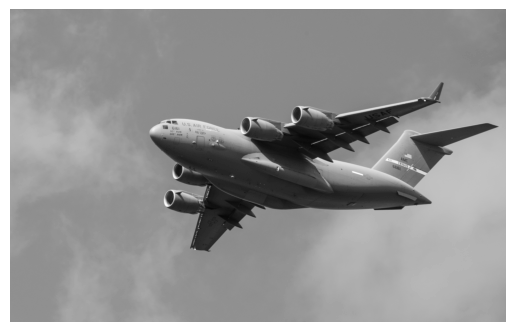

In [91]:
import cv2
from matplotlib import pyplot as plt

# 이미지 데이터를 흑백으로 가져오기 - 2차원 배열
# C/C++ 이나 Python에서는 상수를 정의할 때 이름을 사용한 경우에
# 상수 대신에 값을 직접 입력해도 됨
# cv.2 IMREAD_GRAYSCALE대신에 0을 입력해도 됨
# 그렇지만 상수 이름을 사용하는 것을 권장


image = cv2.imread('./data/data/data/plane.jpg', cv2.IMREAD_GRAYSCALE)
print(image.shape)

plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show

(2270, 3600, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

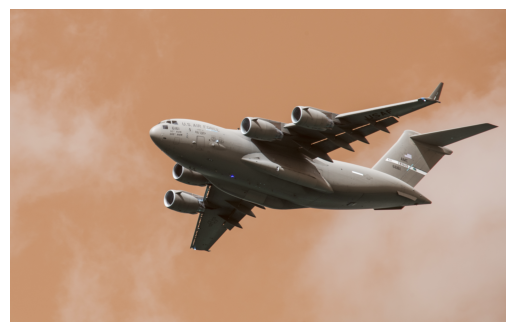

In [93]:
# Open CV 는 이미지를 컬러로 가져오면 RGB가 아니고 BGR임
image = cv2.imread('./data/data/data/plane.jpg', cv2.IMREAD_COLOR)
print(image.shape)

plt.imshow(image)
plt.axis('off')
plt.show

(2270, 3600, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

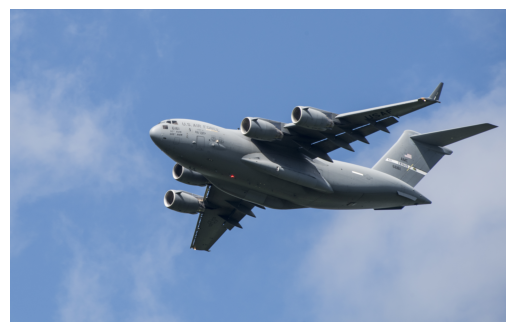

In [95]:
# Open CV 는 이미지를 컬러로 가져오면 RGB가 아니고 BGR임
image = cv2.imread('./data/data/data/plane.jpg', cv2.IMREAD_COLOR)
print(image.shape)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show

In [99]:
image = cv2.imread('./data/data/data/plane.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('./data/data/data/plane_new.jpg',image)

True

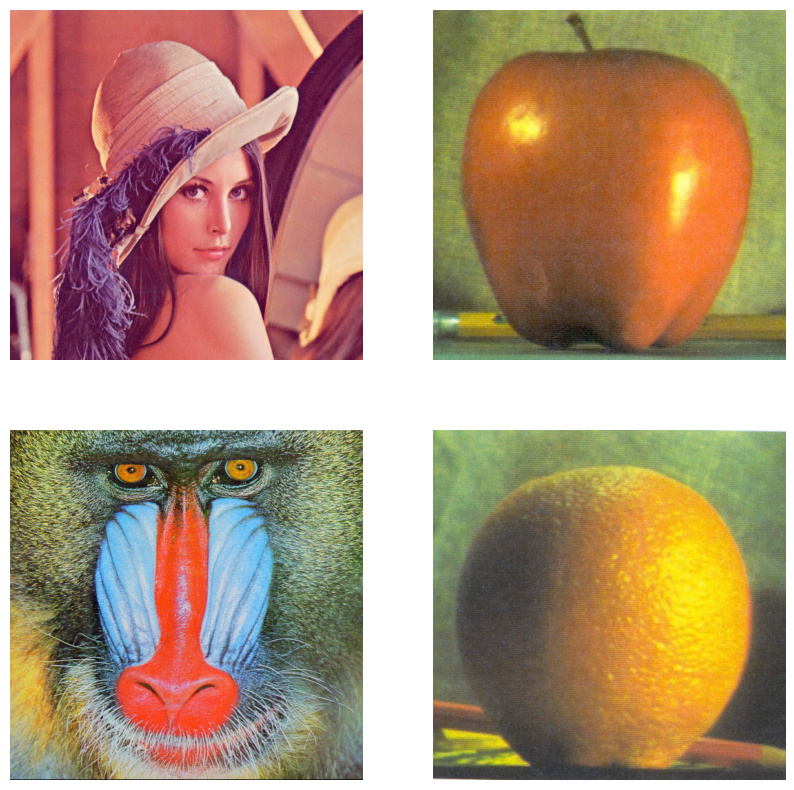

In [104]:
DATA_DIR="./data/data/data/"
# 4개의 이미지를 2*2로 출력
imgBGRs = []

imgBGRs.append(cv2.imread(DATA_DIR + 'lena.jpg'))
imgBGRs.append(cv2.imread(DATA_DIR + 'apple.jpg'))
imgBGRs.append(cv2.imread(DATA_DIR + 'baboon.jpg'))                             
imgBGRs.append(cv2.imread(DATA_DIR + 'orange.jpg'))

#imgBGR1=cv2.imread('./data/data/data/lena.jpg')
#imgBGR2=cv2.imread('./data/data/data/apple.jpg')
#imgBGR3=cv2.imread('./data/data/data/baboon.jpg')
#imgBGR4=cv2.imread('./data/data/data/orange.jpg')

imgRGBs = []   
for i in imgBGRs :
    imgRGBs.append(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
               
#imgRGB1=cv2.cvtColor(imgBGR1, cv2.COLOR_BGR2RGB)
#imgRGB2=cv2.cvtColor(imgBGR2, cv2.COLOR_BGR2RGB)
#imgRGB3=cv2.cvtColor(imgBGR3, cv2.COLOR_BGR2RGB)
#imgRGB4=cv2.cvtColor(imgBGR4, cv2.COLOR_BGR2RGB)

# 여러 개의 영역 만들기
fig, ax = plt.subplots(2,2,figsize=(10,10),sharey=True)

length = len(imgRGBs)
for i in range(length):
    ax[i // 2][i % 2].axis('off')
    ax[i // 2][i % 2].imshow(imgRGBs[i], aspect='auto')

#ax[0][0].axis('off')
#ax[0][0].imshow(imgRGB1, aspect='auto')

#ax[0][1].axis('off')
#ax[0][1].imshow(imgRGB2, aspect='auto')

#ax[1][0].axis('off')
#ax[1][0].imshow(imgRGB3, aspect='auto')

#ax[1][1].axis('off')
#ax[1][1].imshow(imgRGB4, aspect='auto')


In [107]:
import cv2

# 문자열 출력 함수
def put_string(frame, text,pt, value, color=(120,200,90)):
    text +=str(value)
    shade = (pt[0] + 2,pt[1] +2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, text, shade, font, 0.7, (0,0,0), 2)
    cv2.putText(frame, text, pt, font, 0.7, color, 2)
    
# 현재 디바이스의 첫번째 카메라 연결
capture = cv2.VideoCapture(0)

# 카메라가 연결되지 않으면 종료
if capture.isOpened() == False :
    raise Exception('카메라 연결 안됨')
    
while True :
    ret, frame = capture.read()
    if not ret :
        break
    if cv2.waitKey(30) >= 0 :
        break
        
    exposure = capture.get(cv2.CAP_PROP_EXPOSURE)
    put_string(frame, "EXPOSURE", (10,40), exposure)
    title = "View Frame From Camera"
    cv2.imshow(title, frame)
capture.release() #비디오 자원 해제

In [11]:
import cv2

cap = cv2.VideoCapture('http:192.168.0.6:4747/video')
#cap = cv2.VideoCapture('http:192.168.0.6:4747/mjpegfeed')

#카메라의 해상도 확인
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
             int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)
while True :
    #스마트 폰 카메라가 촬영하고 있는 영상을 가져오기
    retval, frame = cap.read()
    if not retval :
        break
    # 영상을 화면에 출력
    cv2.imshow('frame', frame)
    # 키보드 대기
    key = cv2.waitKey(25)
    # esc 누르면 종료
    if key == 27 :
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()


frame_size= (640, 480)


img shape: (512, 512)
img shape: (262144,)
img shape: (1, 512, 512)


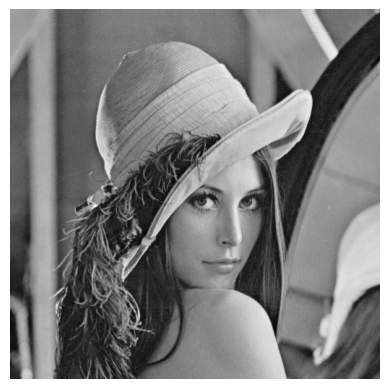

In [18]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('./data/data/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
print("img shape:", img.shape)

# 2차원 이미지를 1차원으로 변경
img = img.flatten()
print("img shape:", img.shape)

# 1차원 이미지를 3차원으로 변경
# -1은 나머지를 전부 사용한다라는 의미
# 252144 / 512 / 512 가 첫 번째 차원
img = img.reshape(-1, 512, 512)
print("img shape:", img.shape)

plt.imshow(img[0], cmap='gray')
plt.axis('off')
plt.show()


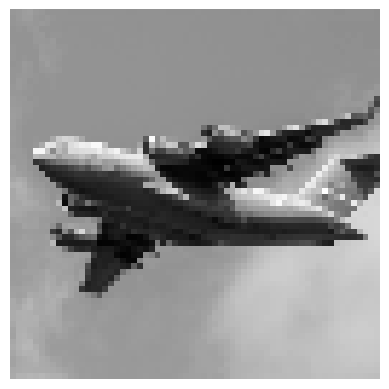

In [20]:
img = cv2.imread('./data/data/data/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64,64))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

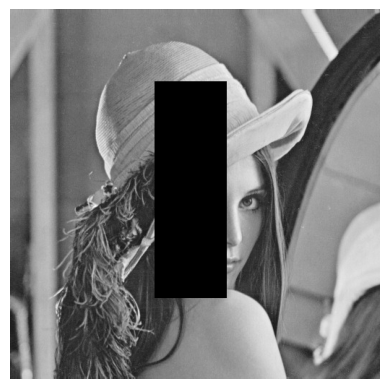

In [22]:
img = cv2.imread('./data/data/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
img[100,200] = 0
img[100:400, 200:300] = 0 # 이미지의 특정 부분을 선택하는 것을 ROI라고 함
# 이미지 전처리의 핵심 중 하나가 ROI 부분을 다른 부분과 확연하게 구분되도록 하는 것

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

(512, 512, 3)


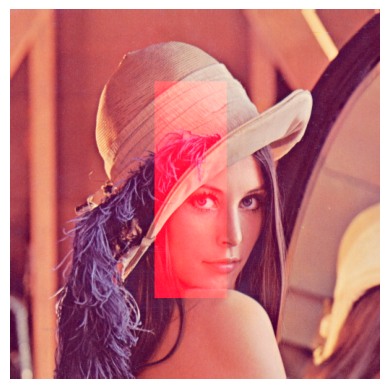

In [26]:
img = cv2.imread('./data/data/data/lena.jpg')
# BGR을 RGB로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape) # 맨 앞의 세로, 두 번째가 가로, 세 번째가 색상
img[100:400, 200:300,0] = 255

plt.imshow(img)
plt.axis('off')
plt.show()



In [28]:
img = cv2.imread('./data/data/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
roi = cv2.selectROI(img)
print('roi:', roi)

# 선택 영역만 추출
img = img[roi[1]:roi[1] + roi[3], roi[0]:roi[0] + roi[2]]
cv2.imshow("IMG", img)
cv2.waitKey()
cv2.destroyAllWindows()



roi: (96, 83, 296, 274)


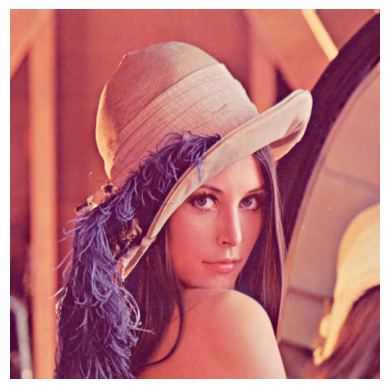

In [31]:
img = cv2.imread('./data/data/data/lena.jpg')

# 채널 분할
b,g,r = cv2.split(img)
# 채널 병합
img = cv2.merge([r,g,b])

plt.imshow(img)
plt.axis('off')
plt.show()



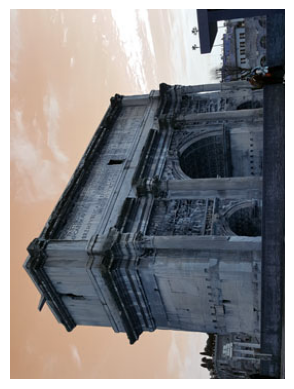

In [43]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("./data/data/data/flip_test.jpg")
#flip = cv2.flip(img,-1) # 축을 기준으로 뒤집기
#flip = cv2.transpose(img) # 행열을 전치
#flip = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
#flip = cv2.rotate(img, cv2.ROTATE_180)
flip = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(flip)
plt.axis('off')
plt.show()

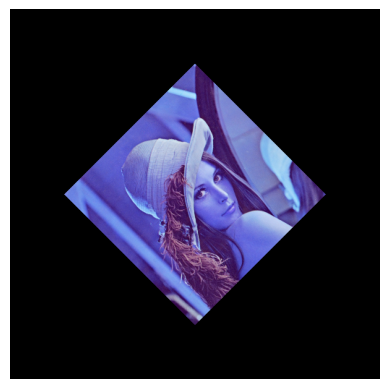

In [48]:
src  = cv2.imread('./data/data/data/lena.jpg')

rows, cols, channels = src.shape

# 중앙을 기준으로 45도 회전하고 0.5배 축소한 이미지 생성
M1 = cv2.getRotationMatrix2D((rows/2, cols/2), 45, 0.5)  # (rows/2, cols/2) 대신에 (0,0)으로 지정하면 왼쪽 위쪽을 기준으로 회전함
src = cv2.warpAffine(src, M1, (rows, cols))


plt.imshow(src)
plt.axis('off')
plt.show()
